In [1]:
import pandas as pd
import numpy as np
import mavenn
import matplotlib.pyplot as plt 
import seaborn as sns
from scipy.stats import ttest_ind, false_discovery_control, pearsonr
from math import ceil
sns.set_context('talk')
sns.set_palette('colorblind')

In [2]:
df = pd.read_excel('../23.06.29_new_library_design/2024_01_19_experimental_results/DSM_results.xlsx')
to_analyze = df.dropna(axis='index', how='any')
display(to_analyze.shape)
annotations = to_analyze.annotation.str.split('_',expand=True)
annotations = annotations.rename(columns={0:'mut_number', 1:'variant', 2:'version'})
variant_info = annotations['variant'].str.extract('(?P<position>\d*)(?P<AA>[a-zA-Z\*]*)')
to_analyze = pd.concat([to_analyze,annotations,variant_info],axis='columns')
mean_effects = to_analyze[['avrg LFC','variant']].groupby('variant').mean()
split_names = mean_effects.index.str.extract('(?P<position>\d*)(?P<AA>[a-zA-Z\*]*)')
split_names.index = mean_effects.index
mean_effects = pd.concat([mean_effects, split_names], axis='columns')


(5988, 15)

In [3]:
aa_keys = np.array('R,H,K,D,E,S,T,N,Q,A,V,I,L,M,F,Y,W,C,G,P,*'.split(','))
aa_encoding = {v:k for k,v in enumerate(aa_keys)}

wt_aa = 'ESVPGDYSKRVYQGVRVKHTVKDLLAEKRSGQTSNSRLNGSVSSSQSPFVQ'
wt_oh = np.array(list(wt_aa))[None,:]==aa_keys[:,None]

aa = np.array([aa_encoding[aa] for aa in mean_effects.AA[:-1].to_numpy()])

In [19]:
colorscheme = 'RdBu'
WT_color = 'xkcd:violet'

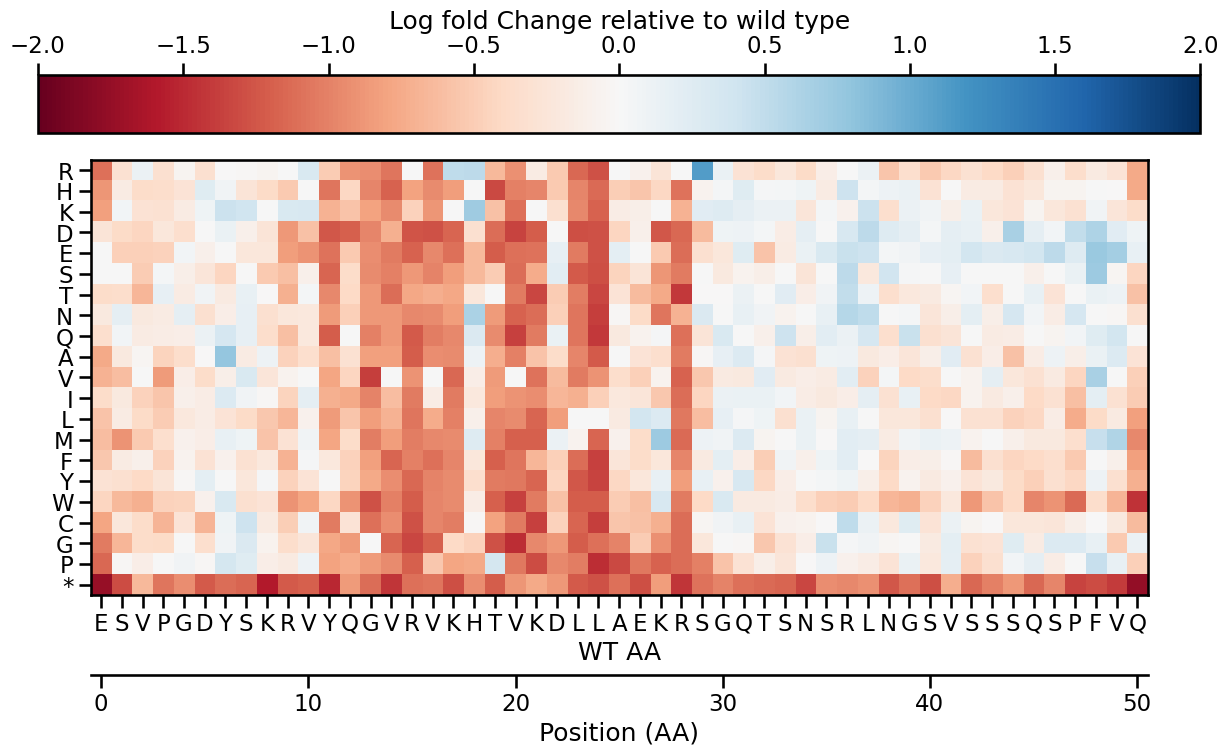

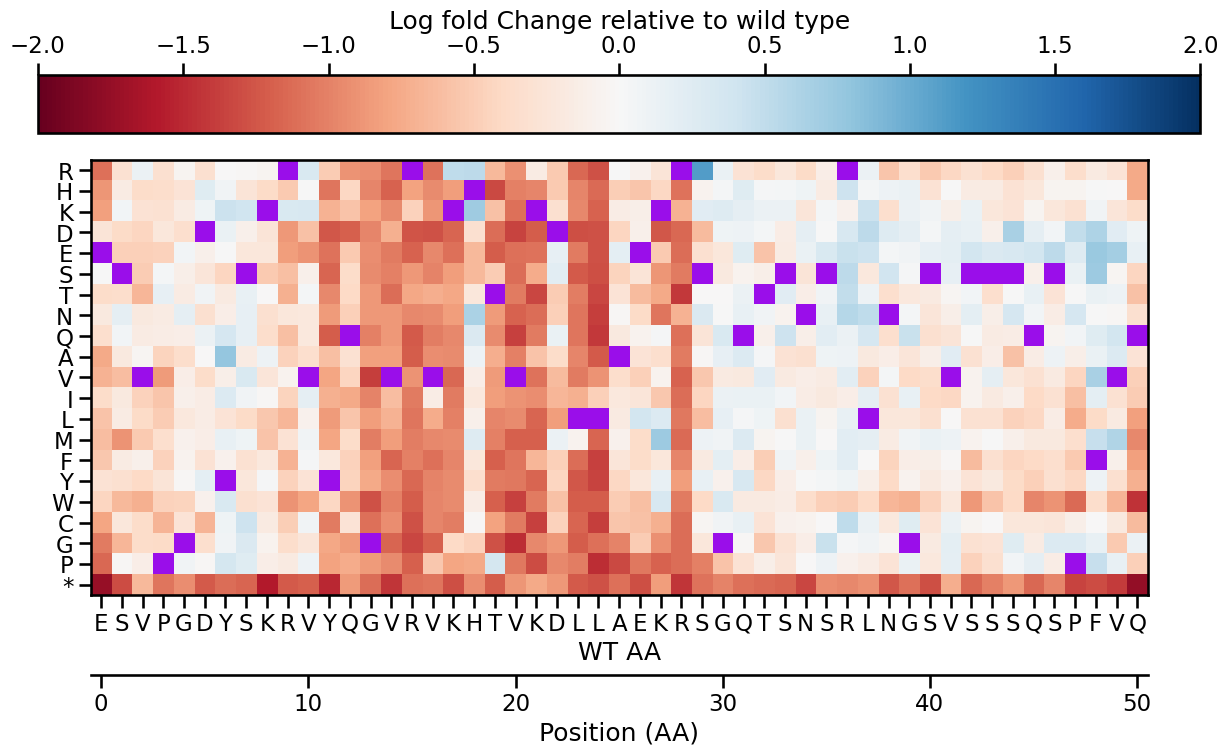

In [20]:
import matplotlib as mpl
cmap = mpl.colormaps.get_cmap(colorscheme)
cmap.set_bad(color=WT_color)

fig=plt.figure(figsize=(15,8))
ax1 = fig.add_subplot(1,1,1)
fitnesses = np.zeros((21,51))
# fitnesses[:,:]=np.nan
fitnesses[aa.astype(int), mean_effects.position[:-1].to_numpy().astype(int)-1] = mean_effects['avrg LFC'][:-1]-mean_effects['avrg LFC'][-1]
plot_max = ceil(np.nanmax(np.abs(fitnesses)))
plt.imshow(fitnesses,interpolation='none', cmap=cmap,norm=mpl.colors.TwoSlopeNorm(vmin=-plot_max,vmax=plot_max,vcenter=0.0))
plt.yticks(np.arange(len(aa_keys)),aa_keys)
plt.xticks(np.arange(len(wt_aa)),list(wt_aa))
plt.xlabel('WT AA')
cbar = plt.colorbar(orientation='horizontal',location='top')
cbar.set_label('Log fold Change relative to wild type')

fig.subplots_adjust(bottom=0.2)
pos = ax1.get_position()
pos = (pos.bounds[0],0.1, pos.bounds[2], pos.bounds[3])
ax2 = fig.add_axes(pos)
ax2.patch.set_visible(False)
ax2.yaxis.set_visible(False)
ax2.spines[['right', 'top', 'left']].set_visible(False)
ax2.set_xlim(ax1.get_xlim())
ax2.set_xlabel('Position (AA)')

plt.show()


fig = plt.figure(figsize=(15,8))
ax1 = fig.add_subplot(1,1,1)
fitnesses = np.zeros((21,51))
fitnesses[aa.astype(int), mean_effects.position[:-1].to_numpy().astype(int)-1] = mean_effects['avrg LFC'][:-1]-mean_effects['avrg LFC'][-1]
fitnesses[wt_oh] = np.nan
plot_max = ceil(np.nanmax(np.abs(fitnesses)))
plt.imshow(fitnesses,interpolation='none', cmap=cmap,norm=mpl.colors.TwoSlopeNorm(vmin=-plot_max,vmax=plot_max,vcenter=0.0))
plt.yticks(np.arange(len(aa_keys)),aa_keys)
plt.xticks(np.arange(len(wt_aa)),list(wt_aa))
plt.xlabel('WT AA')
cbar = plt.colorbar(orientation='horizontal',location='top')
cbar.set_label('Log fold Change relative to wild type')

fig.subplots_adjust(bottom=0.2)
pos = ax1.get_position()
pos = (pos.bounds[0],0.1, pos.bounds[2], pos.bounds[3])
ax2 = fig.add_axes(pos)
ax2.patch.set_visible(False)
ax2.yaxis.set_visible(False)
ax2.spines[['right', 'top', 'left']].set_visible(False)
ax2.set_xlim(ax1.get_xlim())
ax2.set_xlabel('Position (AA)')
plt.show()

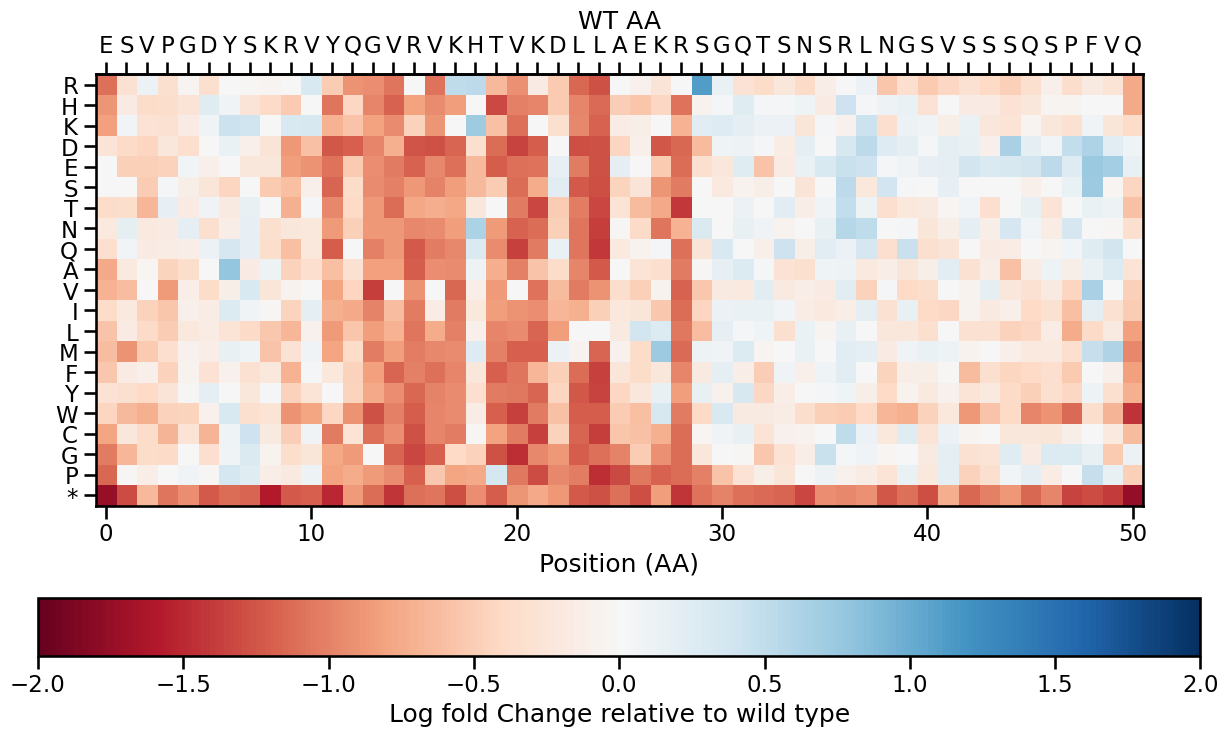

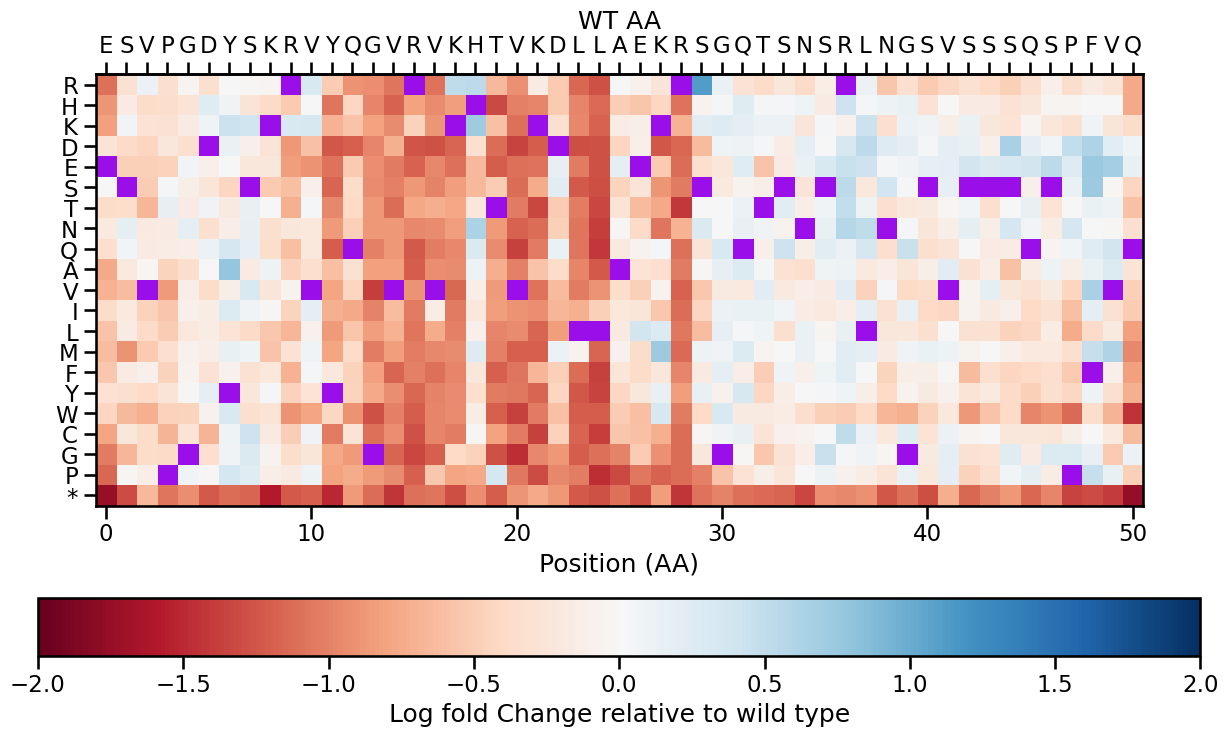

In [5]:
import matplotlib as mpl
cmap = mpl.colormaps.get_cmap(colorscheme)
cmap.set_bad(color=WT_color)

fig=plt.figure(figsize=(15,8))
ax1 = fig.add_subplot(1,1,1)
fitnesses = np.zeros((21,51))
# fitnesses[:,:]=np.nan
fitnesses[aa.astype(int), mean_effects.position[:-1].to_numpy().astype(int)-1] = mean_effects['avrg LFC'][:-1]-mean_effects['avrg LFC'][-1]
plot_max = ceil(np.nanmax(np.abs(fitnesses)))
plt.imshow(fitnesses,interpolation='none', cmap=cmap,norm=mpl.colors.TwoSlopeNorm(vmin=-plot_max,vmax=plot_max,vcenter=0.0))
plt.yticks(np.arange(len(aa_keys)),aa_keys)
ax1.set_xlabel('Position (AA)')

ax2 = ax1.secondary_xaxis('top')
ax2.set_xticks(np.arange(len(wt_aa)),list(wt_aa))
ax2.set_xlabel('WT AA')

cbar = plt.colorbar(orientation='horizontal')
cbar.set_label('Log fold Change relative to wild type')
plt.show()


fig = plt.figure(figsize=(15,8))
ax1 = fig.add_subplot(1,1,1)
fitnesses = np.zeros((21,51))
fitnesses[aa.astype(int), mean_effects.position[:-1].to_numpy().astype(int)-1] = mean_effects['avrg LFC'][:-1]-mean_effects['avrg LFC'][-1]
fitnesses[wt_oh] = np.nan
plot_max = ceil(np.nanmax(np.abs(fitnesses)))
plt.imshow(fitnesses,interpolation='none', cmap=cmap,norm=mpl.colors.TwoSlopeNorm(vmin=-plot_max,vmax=plot_max,vcenter=0.0))
plt.yticks(np.arange(len(aa_keys)),aa_keys)
ax1.set_xlabel('Position (AA)')

ax2 = ax1.secondary_xaxis('top')
ax2.set_xticks(np.arange(len(wt_aa)),list(wt_aa))
ax2.set_xlabel('WT AA')

cbar = plt.colorbar(orientation='horizontal')
cbar.set_label('Log fold Change relative to wild type')
plt.show()

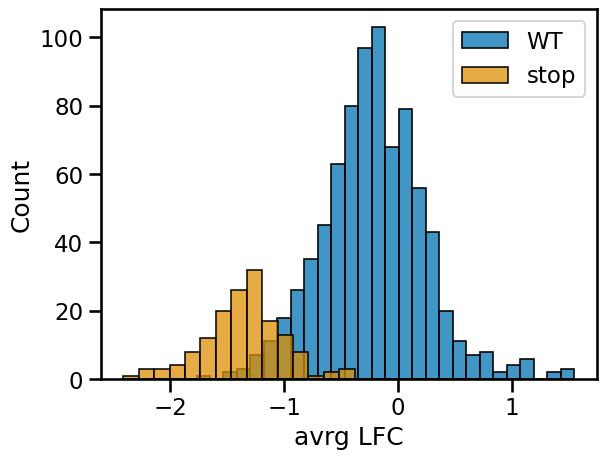

In [23]:
sns.histplot(to_analyze[to_analyze.variant == 'WT']['avrg LFC'], label='WT')
sns.histplot(to_analyze[to_analyze.AA == '*']['avrg LFC'], label='stop')
plt.legend()

In [3]:
df

,seq,annotation,OCA-T1 Lib,Rep1 P0,Rep1 P10,Rep2 P0,Rep2 P10,OCA-T1 Lib.1,Rep1 P0.1,Rep1 P10.1,Rep2 P0.1,Rep2 P10.1,lfc R1,lfc R2,avrg LFC
0,GAAAGCGTGCCAGGAGATTACAGCAAAAGAGTGTACCAGGGGGTGC...,0pt_WT_v1,2438.000000,5176.000000,2982.000000,2051.000000,4088.000000,166.687691,146.243901,147.996986,80.456478,100.618075,0.017191,0.322609,0.169900
1,GAAAGCGTGCCCGGCGATTACAGCAAAAGGGTGTATCAGGGAGTGA...,0pt_WT_v10,2183.000000,5634.000000,4139.000000,4925.000000,4025.000000,149.253170,159.184339,205.419022,193.197540,99.067454,0.367871,-0.963594,-0.297861
2,GAGAGCGTGCCAGGGGACTATAGCAAACGGGTGTATCAGGGCGTGC...,0pt_WT_v100,3949.000000,8720.000000,5459.000000,6391.000000,4102.000000,269.995771,246.376896,270.930767,250.705681,100.962658,0.137057,-1.312173,-0.587558
3,GAGAGCGTGCCAGGCGATTATAGCAAAAGAGTGTATCAGGGAGTGC...,0pt_WT_v101,2358.000000,3598.000000,1664.000000,1652.000000,1874.000000,161.218037,101.658724,82.584502,64.804535,46.124822,-0.299791,-0.490551,-0.395171
4,GAGAGCGTGCCAGGAGACTACAGCAAAAGGGTGTACCAGGGCGTGC...,0pt_WT_v102,2033.000000,5589.000000,3777.000000,3479.000000,4884.000000,138.997570,157.912898,187.452923,136.473958,120.210049,0.247399,-0.183068,0.032166
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5984,GAGAGCGTGCCTGGGGATTATAGCAAGAGGGTGTATCAGGGGGTGA...,1pt_51Y_v2,1588.000000,2847.000000,877.000000,2054.000000,1246.000000,108.572622,80.439796,43.525606,80.574162,30.667838,-0.886045,-1.393591,-1.139818
5985,GAATCCGTGCCCGGGGACTACAGCAAGCGGGTGTATCAGGGAGTGA...,1pt_51Y_v3,1993.000000,4651.000000,1316.000000,3399.000000,1343.000000,136.262743,131.410429,65.313224,133.335724,33.055302,-1.008633,-2.012110,-1.510371
5986,GAATCCGTGCCCGGAGACTACAGCAAAAGGGTGTATCAGGGAGTGA...,1pt_51Y_v4,1664.000000,4154.000000,1657.000000,2789.000000,2210.000000,113.768793,117.368077,82.237091,109.406688,54.394801,-0.513179,-1.008160,-0.760670
5987,GAAAGCGTGCCAGGCGACTACAGCAAAAGAGTGTACCAGGGCGTGC...,1pt_51Y_v5,1464.000000,3341.000000,1129.000000,2310.000000,1844.000000,100.094659,94.397387,56.032393,90.616511,45.386431,-0.752486,-0.997513,-0.874999


In [13]:
for_qc = df[['annotation','OCA-T1 Lib','Rep1 P0','Rep1 P10', 'Rep2 P0', 'Rep2 P10']]
for_qc = for_qc.melt(id_vars='annotation', value_vars = ['OCA-T1 Lib','Rep1 P0','Rep1 P10', 'Rep2 P0', 'Rep2 P10'], value_name = 'read count', var_name = 'Sequenceing library')
for_qc = for_qc.join(for_qc['Sequenceing library'].str.split(' ',expand=True).rename(columns = {0:'Replicate', 1:'Time point'}))

for_qc

,annotation,Sequenceing library,read count,Replicate,Time point
0,0pt_WT_v1,OCA-T1 Lib,2438.000000,OCA-T1,Lib
1,0pt_WT_v10,OCA-T1 Lib,2183.000000,OCA-T1,Lib
2,0pt_WT_v100,OCA-T1 Lib,3949.000000,OCA-T1,Lib
3,0pt_WT_v101,OCA-T1 Lib,2358.000000,OCA-T1,Lib
4,0pt_WT_v102,OCA-T1 Lib,2033.000000,OCA-T1,Lib
...,...,...,...,...,...
29940,1pt_51Y_v2,Rep2 P10,1246.000000,Rep2,P10
29941,1pt_51Y_v3,Rep2 P10,1343.000000,Rep2,P10
29942,1pt_51Y_v4,Rep2 P10,2210.000000,Rep2,P10
29943,1pt_51Y_v5,Rep2 P10,1844.000000,Rep2,P10


In [ ]:
for_qc.melt()

[0.21203336375347348,
 0.2852908911142429,
 0.409931353860324,
 0.33674469253154293,
 0.6591383334899039]

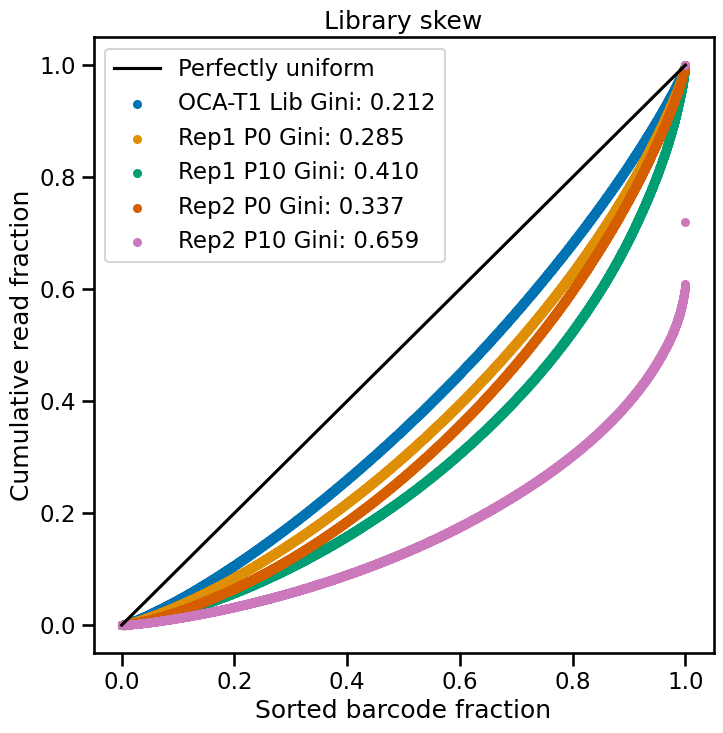

In [20]:
def gini(sorted_arr):
    n = sorted_arr.size
    coef_ = 2. / n
    const_ = (n + 1.) / n
    weighted_sum = sum([(i+1)*yi for i, yi in enumerate(sorted_arr)])
    return coef_*weighted_sum/(sorted_arr.sum()) - const_

def multi_gini(xs,labels,title='Library skew'):
    gs = []
    fig, ax = plt.subplots(figsize=[8,8])
    ax.plot([0,1], [0,1], color='k',label='Perfectly uniform')
    for X_u, label in zip(xs, labels):
        X = X_u.copy()
        X.sort()
        X_lorenz = X.cumsum() / X.sum()
        X_lorenz = np.insert(X_lorenz, 0, 0)
        gs.append(gini(X))
        ax.scatter(np.arange(X_lorenz.size)/(X_lorenz.size-1), X_lorenz, 
               marker='.', label=str(label)+' Gini: %.3f'%gs[-1], s=100,)
    plt.xlabel('Sorted barcode fraction')
    plt.ylabel('Cumulative read fraction')
    plt.legend(loc='upper left')
    plt.title(title)
    return(gs)

libs = ['OCA-T1 Lib','Rep1 P0','Rep1 P10', 'Rep2 P0', 'Rep2 P10']
multi_gini([df[key].values for key in libs],libs,title='Library skew')

[]

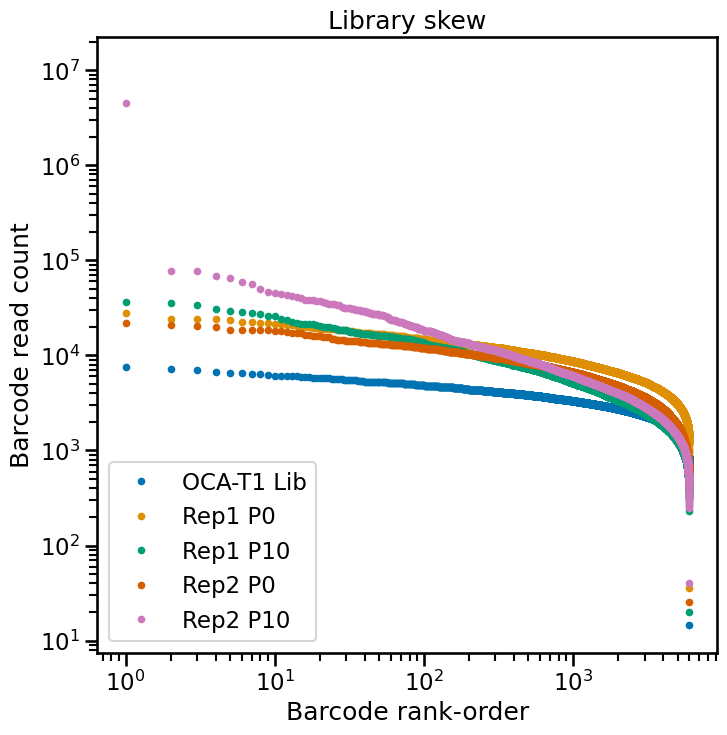

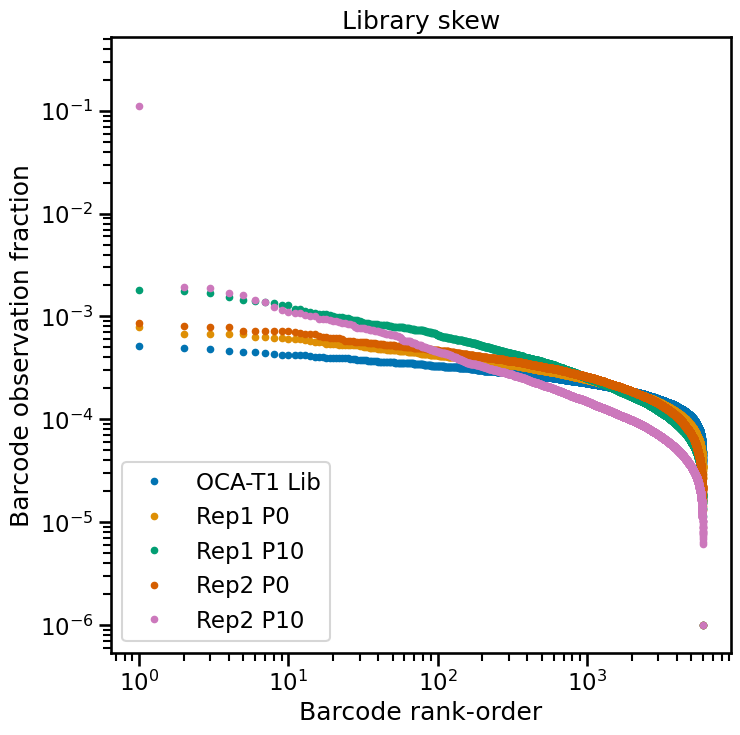

In [33]:
def outlier_plot(xs,labels,title='Library skew'):
    gs = []
    fig1, ax_reads = plt.subplots(figsize=(8,8))
    fig2, ax_fraction = plt.subplots(figsize=(8,8))
    for X_u, label in zip(xs, labels):
        sort_obs = sorted(X_u,reverse=True)

        plt.sca(ax_reads)
        plt.loglog(range(len(sort_obs)), sort_obs, '.', label=label)

        plt.sca(ax_fraction)
        plt.loglog(range(len(sort_obs)), sort_obs/sum(sort_obs), '.', label=label)

    plt.sca(ax_reads)
    # plt.grid(visible=True, which='major', axis = 'y')
    plt.xlabel('Barcode rank-order')
    plt.ylabel('Barcode read count')
    plt.legend(loc='lower left')
    plt.title(title)


    plt.sca(ax_fraction)
    plt.xlabel('Barcode rank-order')
    plt.ylabel('Barcode observation fraction')
    plt.legend(loc='lower left')
    plt.title(title)
    return(gs)

libs = ['OCA-T1 Lib','Rep1 P0','Rep1 P10', 'Rep2 P0', 'Rep2 P10']
outlier_plot([df[key].values for key in libs],libs,title='Library skew')

In [24]:
agged = to_analyze[['avrg LFC','variant']].groupby('variant').agg(['mean','std','count'])
agged

avrg LFC                
             mean       std count
variant                          
01*     -1.944745  0.406910     3
01A     -0.964202  0.393176     5
01C     -0.995770  0.302344     5
01D     -0.472530  0.294639     5
01F     -0.742202  0.399190     5
...           ...       ...   ...
51T     -0.799632  0.210054     5
51V     -0.692830  0.381663     5
51W     -1.662792  0.209945     5
51Y     -0.925369  0.435712     5
WT      -0.210367  0.455778   800

[1021 rows x 3 columns]

,t_stat,pval,mean_dif,mean,std,count,fdr_pvals,sig
variant,,,,,,,,
01*,-6.580340,8.475802e-11,-1.734379,-1.944745,0.406910,3.0,3.377447e-09,True
01A,-3.689200,2.401252e-04,-0.753836,-0.964202,0.393176,5.0,8.572300e-04,True
01C,-3.846608,1.292554e-04,-0.785403,-0.995770,0.302344,5.0,4.798902e-04,True
01D,-1.284047,1.994959e-01,-0.262163,-0.472530,0.294639,5.0,3.245780e-01,False
01F,-2.602602,9.422547e-03,-0.531835,-0.742202,0.399190,5.0,2.525045e-02,True
...,...,...,...,...,...,...,...,...
51T,-2.887639,3.985737e-03,-0.589265,-0.799632,0.210054,5.0,1.146320e-02,True
51V,-2.361385,1.844473e-02,-0.482464,-0.692830,0.381663,5.0,4.537847e-02,True
51W,-7.117482,2.439393e-12,-1.452426,-1.662792,0.209945,5.0,2.306346e-10,True


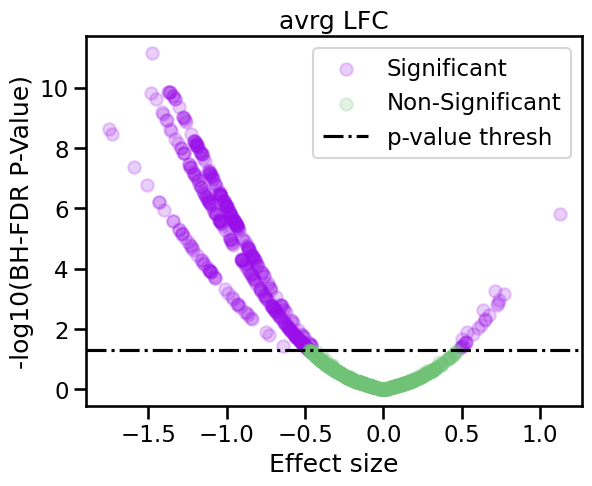

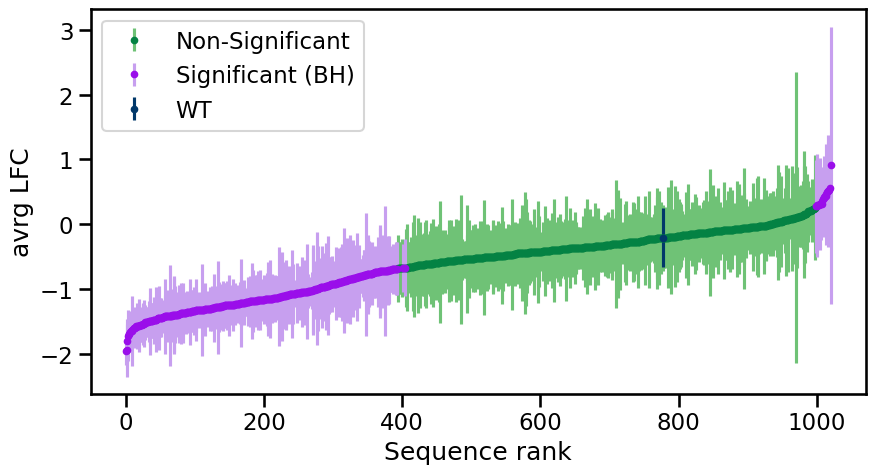

In [25]:
thresh = 0.05
column = 'avrg LFC'
def t_test_df(df):
    # print(row)
    out = dict(zip(['t_stat', 'pval'],ttest_ind(df[column], to_analyze[to_analyze.variant == 'WT'][column])))
    out['mean_dif'] = df[column].mean() - to_analyze[to_analyze.variant == 'WT'][column].mean()
    out['mean'] = df[column].mean()
    out['std'] = df[column].std()
    out['count'] = df[column].count()
    return(pd.Series(out))
stat_df = to_analyze.groupby('variant').apply(t_test_df)
stat_df['fdr_pvals'] = false_discovery_control(stat_df['pval'])
stat_df['sig'] = stat_df['fdr_pvals']<=thresh

display(stat_df)

plt.scatter(stat_df[stat_df.sig].mean_dif, 
                -np.log10(stat_df[stat_df.sig].fdr_pvals), 
                color='xkcd:violet', alpha=0.2, label = 'Significant')
plt.scatter(stat_df[np.logical_not(stat_df.sig)].mean_dif, 
                -np.log10(stat_df[np.logical_not(stat_df.sig)].fdr_pvals),
                color='xkcd:soft green', alpha=0.2, label = 'Non-Significant')
plt.axhline(-np.log10(thresh), c='k', linestyle='-.', label = 'p-value thresh')
plt.legend()
plt.xlabel('Effect size')
plt.ylabel('-log10(BH-FDR P-Value)')
plt.title(column)
plt.show()

stat_df = stat_df.sort_values('mean')
plt.figure(figsize=(10,5))
xs = np.arange(len(stat_df))
plt.errorbar(xs[np.logical_not(stat_df.sig)], 
                stat_df['mean'][np.logical_not(stat_df.sig)], 
                yerr=stat_df['std'][np.logical_not(stat_df.sig)], 
                fmt='.',color='xkcd:jungle green',
            ecolor='xkcd:soft green',
            label='Non-Significant')
plt.errorbar(xs[stat_df.sig], 
                stat_df['mean'][stat_df.sig], 
                yerr=stat_df['std'][stat_df.sig], 
                fmt='.',color='xkcd:violet',
            ecolor='xkcd:lavender',
            label='Significant (BH)')
wt_mask = stat_df.index=='WT'
plt.errorbar(xs[wt_mask], 
                stat_df.loc['WT']['mean'], 
                yerr=stat_df.loc['WT']['std'], 
                fmt='.',color='xkcd:marine blue',
            ecolor='xkcd:marine blue',
            label='WT')
plt.legend(loc='upper left')
plt.xlabel('Sequence rank')
plt.ylabel(column)
plt.show()

,t_stat,pval,mean_dif,mean,std,count,sig
variant,,,,,,,
01*,-6.580340,8.475802e-11,-1.734379,-1.944745,0.406910,3.0,True
01A,-3.689200,2.401252e-04,-0.753836,-0.964202,0.393176,5.0,False
01C,-3.846608,1.292554e-04,-0.785403,-0.995770,0.302344,5.0,False
01D,-1.284047,1.994959e-01,-0.262163,-0.472530,0.294639,5.0,False
01F,-2.602602,9.422547e-03,-0.531835,-0.742202,0.399190,5.0,False
...,...,...,...,...,...,...,...
51T,-2.887639,3.985737e-03,-0.589265,-0.799632,0.210054,5.0,False
51V,-2.361385,1.844473e-02,-0.482464,-0.692830,0.381663,5.0,False
51W,-7.117482,2.439393e-12,-1.452426,-1.662792,0.209945,5.0,True


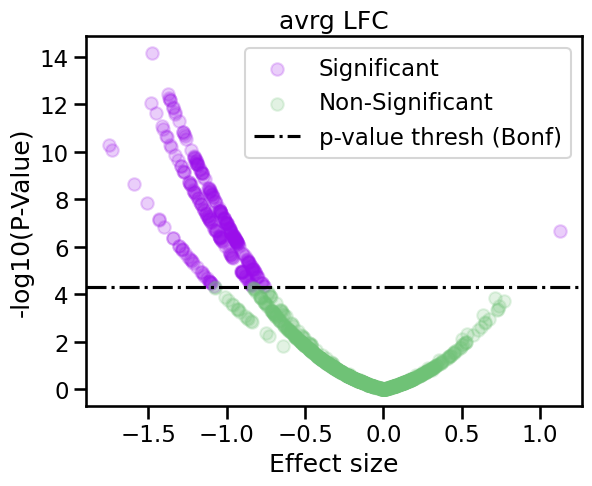

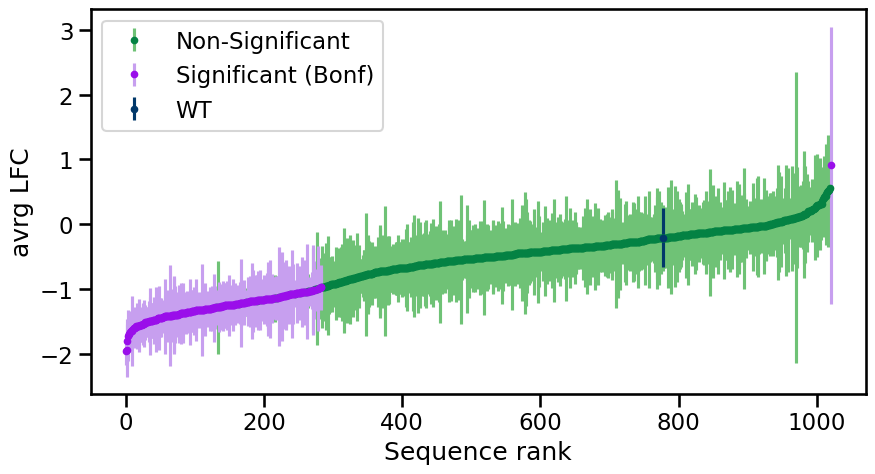

In [58]:
thresh = 0.05
column = 'avrg LFC'
def t_test_df(df):
    # print(row)
    out = dict(zip(['t_stat', 'pval'],ttest_ind(df[column], to_analyze[to_analyze.variant == 'WT'][column])))
    out['mean_dif'] = df[column].mean() - to_analyze[to_analyze.variant == 'WT'][column].mean()
    out['mean'] = df[column].mean()
    out['std'] = df[column].std()
    out['count'] = df[column].count()
    return(pd.Series(out))
stat_df = to_analyze.groupby('variant').apply(t_test_df)
bonf_thresh = thresh/len(stat_df)
stat_df['sig'] = stat_df['pval']<=bonf_thresh

display(stat_df)

plt.scatter(stat_df[stat_df.sig].mean_dif, 
                -np.log10(stat_df[stat_df.sig].pval), 
                color='xkcd:violet', alpha=0.2, label = 'Significant')
plt.scatter(stat_df[np.logical_not(stat_df.sig)].mean_dif, 
                -np.log10(stat_df[np.logical_not(stat_df.sig)].pval),
                color='xkcd:soft green', alpha=0.2, label = 'Non-Significant')
plt.axhline(-np.log10(bonf_thresh), c='k', linestyle='-.', label = 'p-value thresh (Bonf)')
plt.legend()
plt.xlabel('Effect size')
plt.ylabel('-log10(P-Value)')
plt.title(column)
plt.show()

stat_df = stat_df.sort_values('mean')
plt.figure(figsize=(10,5))
xs = np.arange(len(stat_df))
plt.errorbar(xs[np.logical_not(stat_df.sig)], 
                stat_df['mean'][np.logical_not(stat_df.sig)], 
                yerr=stat_df['std'][np.logical_not(stat_df.sig)], 
                fmt='.',color='xkcd:jungle green',
            ecolor='xkcd:soft green',
            label='Non-Significant')
plt.errorbar(xs[stat_df.sig], 
                stat_df['mean'][stat_df.sig], 
                yerr=stat_df['std'][stat_df.sig], 
                fmt='.',color='xkcd:violet',
            ecolor='xkcd:lavender',
            label='Significant (Bonf)')
wt_mask = stat_df.index=='WT'
plt.errorbar(xs[wt_mask], 
                stat_df.loc['WT']['mean'], 
                yerr=stat_df.loc['WT']['std'], 
                fmt='.',color='xkcd:marine blue',
            ecolor='xkcd:marine blue',
            label='WT')
plt.legend(loc='upper left')
plt.xlabel('Sequence rank')
plt.ylabel(column)
plt.show()

Number of true positives: 800
LFC rep1 The optimal threshold range is from -0.5493156894444859 to -0.5455850111105938
The ROCs at specific thresholds are- opt min: [0.84589052], opt max: [0.84589052]
The TPRs at specific thresholds are- opt min: [0.91125], opt max: [0.91125]
The FPRs at specific thresholds are- opt min: [0.06535948], opt max: [0.06535948]
The optimal f-score threshold range is from -0.8030018161491541 to -0.7992711378152619
The optimal g-mean threshold range is from -0.8030018161491541 to -0.7992711378152619


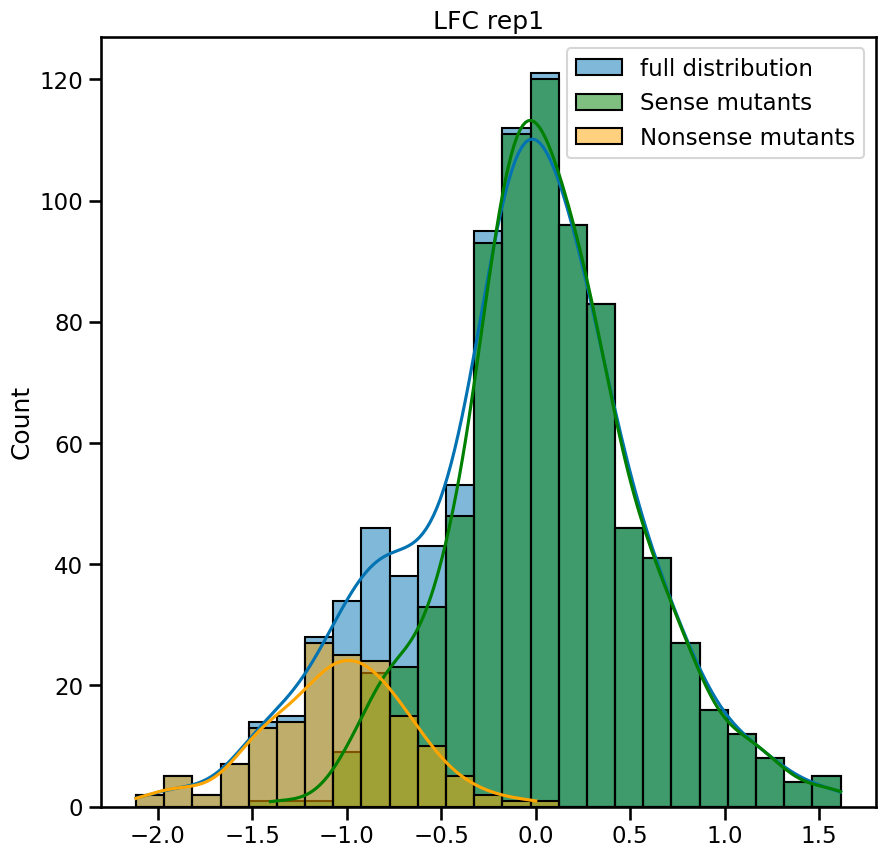

LFC rep2 The optimal threshold range is from -0.9335668649295394 to -0.9335668649295394
The ROCs at specific thresholds are- opt min: [0.74367647], opt max: [0.74367647]
The TPRs at specific thresholds are- opt min: [0.8025], opt max: [0.8025]
The FPRs at specific thresholds are- opt min: [0.05882353], opt max: [0.05882353]
The optimal f-score threshold range is from -1.588286298977299 to -1.5794981186545103
The optimal g-mean threshold range is from -1.588286298977299 to -1.5794981186545103


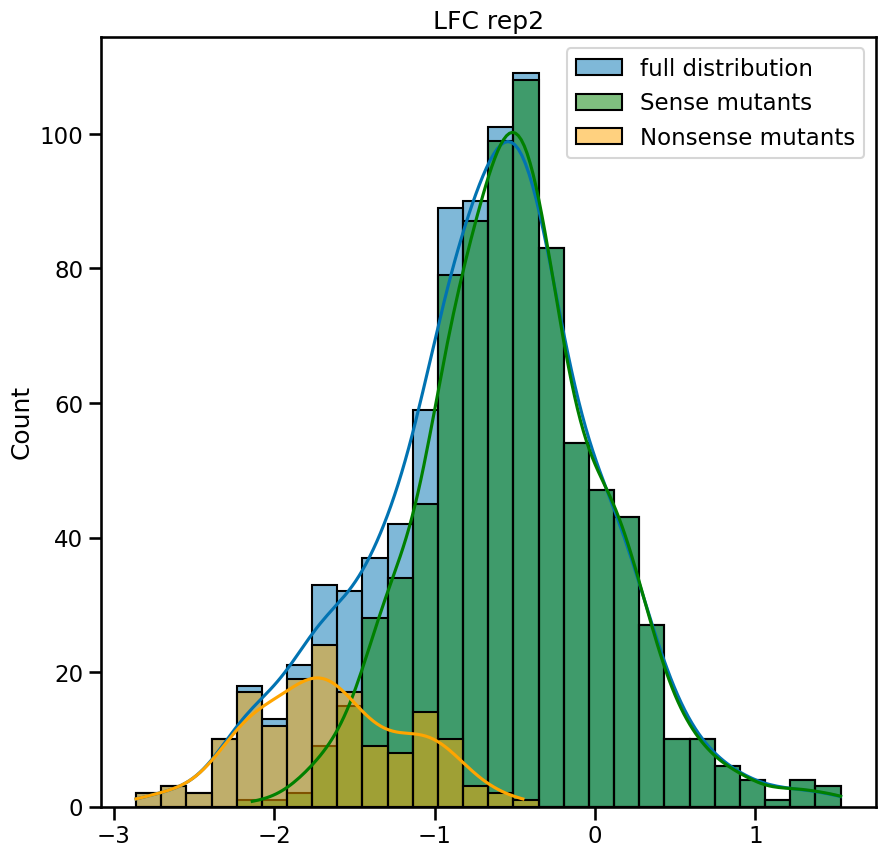

LFC averaged across reps The optimal threshold range is from -0.8015112127295816 to -0.8015112127295816
The ROCs at specific thresholds are- opt min: [0.87203431], opt max: [0.87203431]
The TPRs at specific thresholds are- opt min: [0.91125], opt max: [0.91125]
The FPRs at specific thresholds are- opt min: [0.03921569], opt max: [0.03921569]
The optimal f-score threshold range is from -1.1540758200351573 to -1.146153019870987
The optimal g-mean threshold range is from -1.1540758200351573 to -1.146153019870987


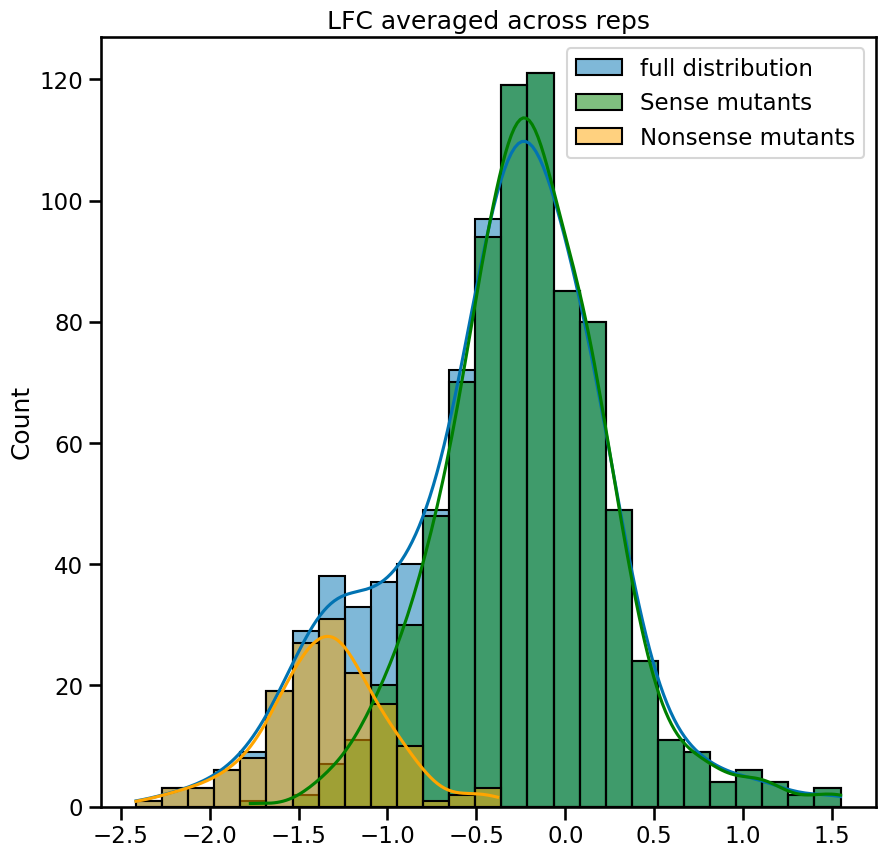


Aggregate stats


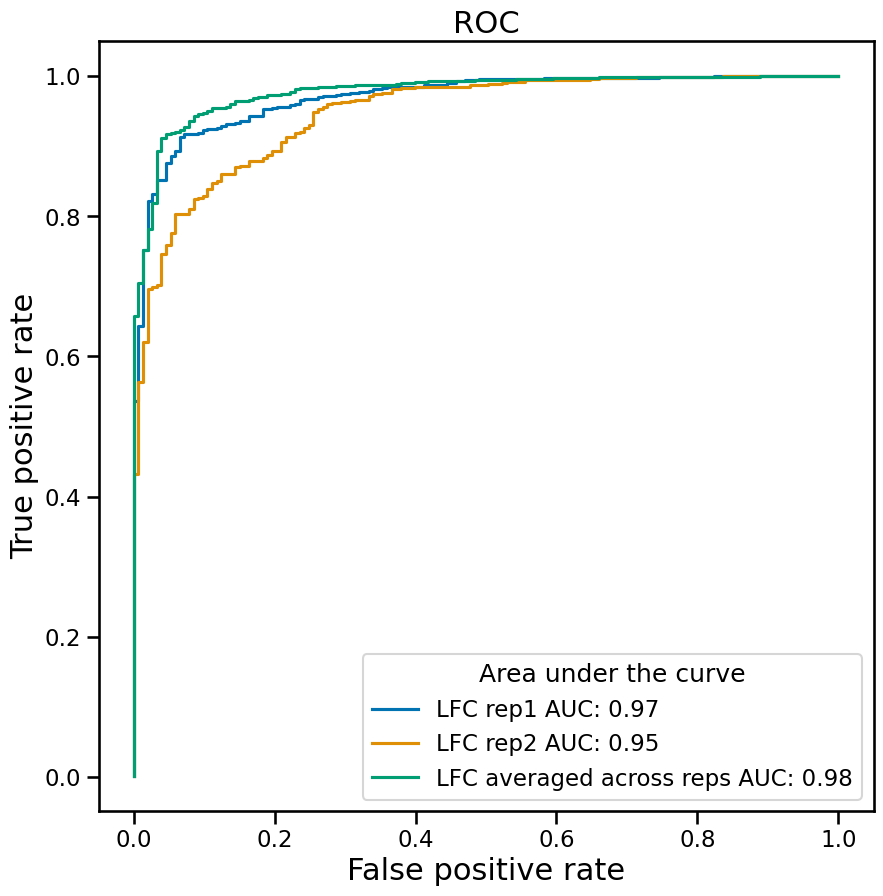

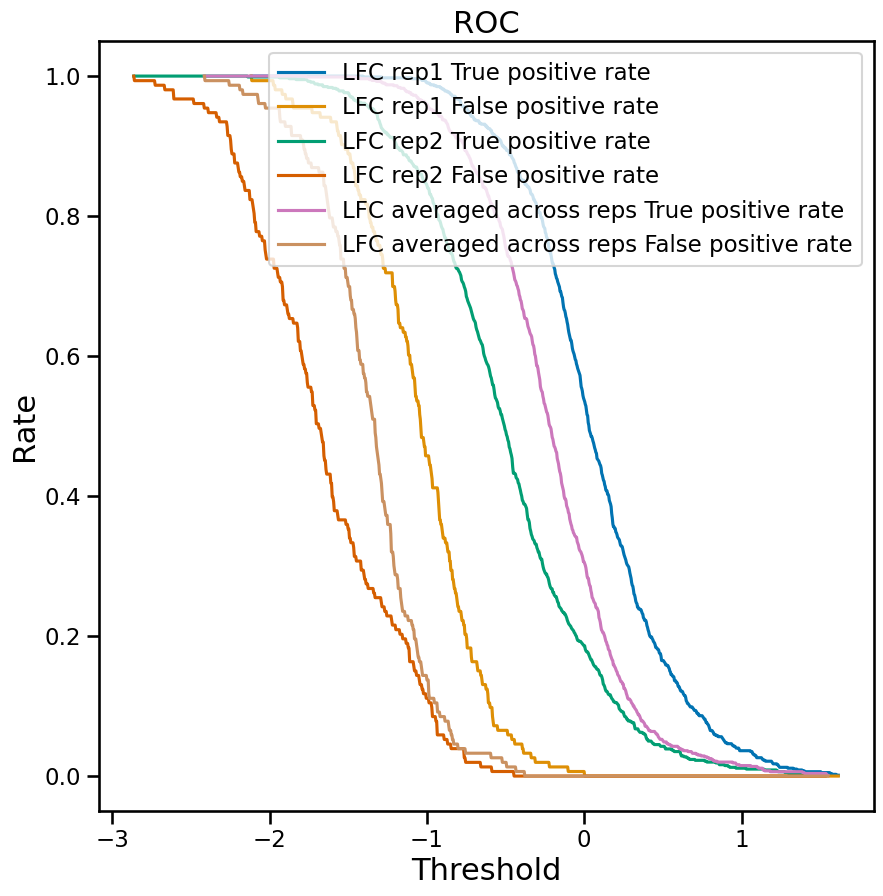

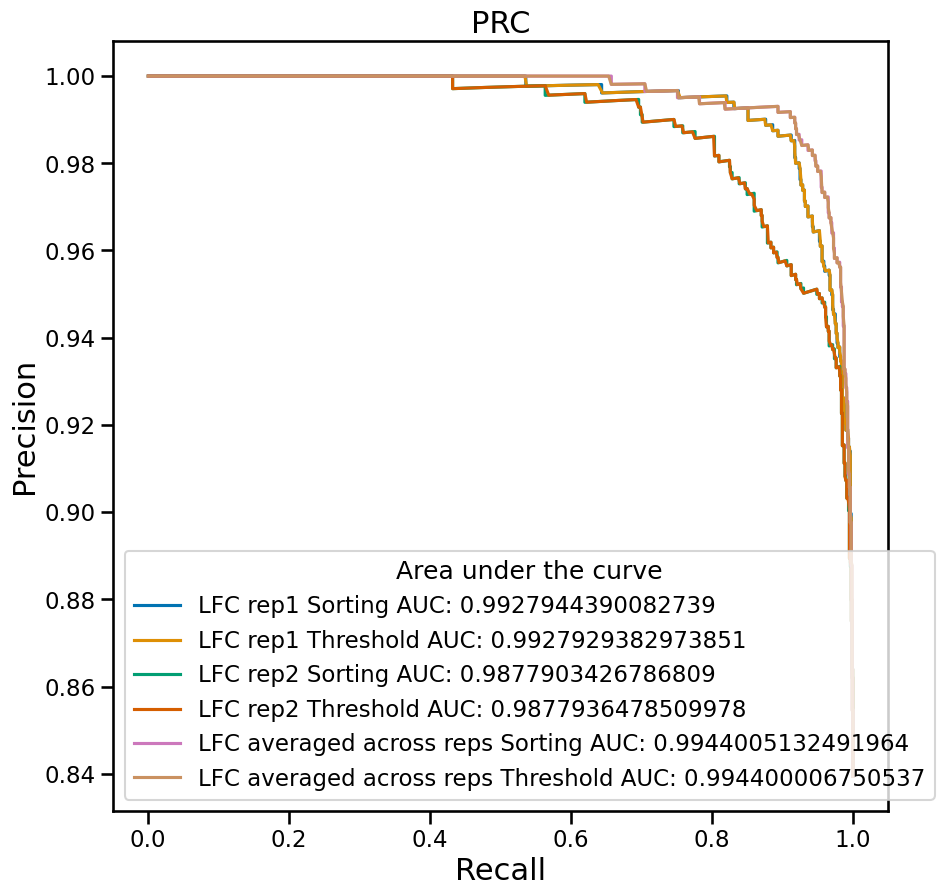

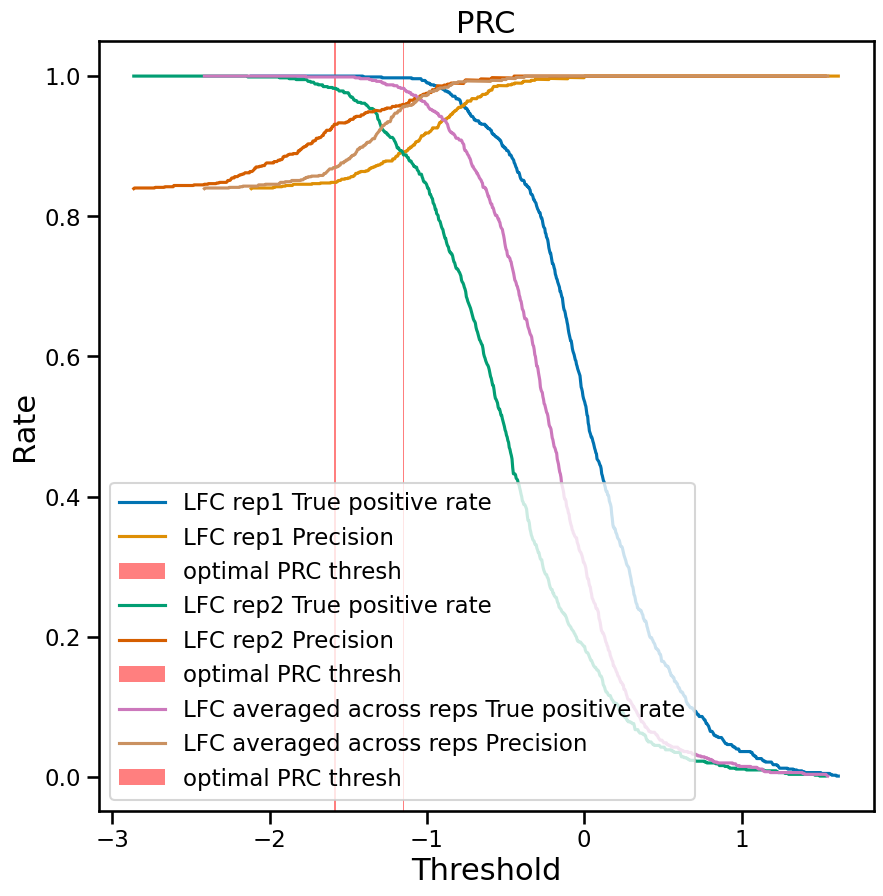

{'LFC rep1 ROC-AUC': 0.9701879084967321,
 'LFC rep1 PRC-AUC': 0.9927944390082739,
 'LFC rep2 ROC-AUC': 0.9471486928104575,
 'LFC rep2 PRC-AUC': 0.9877903426786809,
 'LFC averaged across reps ROC-AUC': 0.9779738562091504,
 'LFC averaged across reps PRC-AUC': 0.9944005132491964}

In [75]:
import seaborn as sns
def make_ROC(true_class, metrics, labels, make_plots, plot_thresh=False):
    if make_plots:
        print('Number of true positives: %s'%sum(true_class))
        fig1, ax1 = plt.subplots(figsize=(10,10))
        fig2, ax2 = plt.subplots(figsize=(10,10))
        fig3, ax3 = plt.subplots(figsize=(10,10))
        fig4, ax4 = plt.subplots(figsize=(10,10))
    aucs = {}
    for metric, label in zip(metrics,labels):
        if make_plots:
            hist_fig, hist_ax = plt.subplots(figsize=(10,10))
            plt.sca(ax1)
        mask = np.argsort(metric)
        decision_curve = true_class[mask]
        tpr = np.cumsum(np.flip(decision_curve))/sum(true_class)
        fpr = np.cumsum(np.flip(decision_curve == 0))/sum(true_class == 0)
        auc = np.trapz(tpr,fpr)
        aucs[label+' ROC-AUC'] = auc
        if make_plots:
            if plot_thresh:
                plt.plot(fpr, tpr, label='%s Sorting AUC: %.2f'%(label, auc))
            else:
                plt.plot(fpr, tpr, label='%s AUC: %.2f'%(label, auc))

            thresholds = np.arange(min(metric),max(metric),(max(metric)-min(metric))/1000)[::-1]
            thresholds[0]=max(metric)
    #         display(thresholds)
    #         display(min(metric))
    #         display(max(metric))

            tpr = np.array([sum(true_class[metric>=t])/sum(true_class) for t in thresholds])
            fpr = np.array([sum(true_class[metric>=t]== 0)/sum(true_class == 0) for t in thresholds])
            if plot_thresh:
                plt.plot(fpr, tpr, label='%s Thresh AUC: %.2f'%(label, np.trapz(tpr,fpr)))

            plt.sca(ax2)
            plt.plot(thresholds, tpr, label='%s True positive rate'%label)
            plt.plot(thresholds, fpr, label='%s False positive rate'%label)

            roc = np.subtract(tpr,fpr)
            t = thresholds[roc == np.nanmax(roc)]

            tmin = min(t)
            tmax = max(t)

            print('%s The optimal threshold range is from %s to %s'%(label, tmin, tmax))
            print('The ROCs at specific thresholds are- opt min: %s, opt max: %s'%(roc[thresholds==tmin],
                                                                                   roc[thresholds==tmax]))

            print('The TPRs at specific thresholds are- opt min: %s, opt max: %s'%(tpr[thresholds==tmin],
                                                                                   tpr[thresholds==tmax]))

            print('The FPRs at specific thresholds are- opt min: %s, opt max: %s'%(fpr[thresholds==tmin],
                                                                                   fpr[thresholds==tmax]))
            plt.sca(hist_ax)
            edges = np.histogram_bin_edges(metric,bins="auto")
            sns.histplot(metric, label = 'full distribution', 
                         bins=edges, kde=True)
            sns.histplot(metric[true_class], color='green', 
                         label = 'Sense mutants', bins=edges, kde=True)
            sns.histplot(metric[np.logical_not(true_class)], 
                         color='orange', label = 'Nonsense mutants', bins=edges, kde=True)

#             if tmin == tmax:
#                 plt.axvline(tmin, c= 'k', alpha=0.5, label='optimal ROC thresh')
#             elif tmin < tmax:
#                 plt.axvspan(tmin, tmax, facecolor='k', alpha=0.5, label='optimal ROC thresh')
#             else:
#                 print('roc thresh error')

            plt.sca(ax2) 
#             if tmin == tmax:
#                 plt.axvline(tmin, c= 'k', alpha=0.5, label='optimal ROC thresh')
#             elif tmin < tmax:
#                 plt.axvspan(tmin, tmax, facecolor='k', alpha=0.5, label='optimal ROC thresh')
#             else:
#                 print('roc thresh error')

            plt.sca(ax3)
        decision_curve = true_class[mask]
        tpr = np.cumsum(np.flip(decision_curve))/sum(true_class)
        precision = np.divide(np.cumsum(np.flip(decision_curve)), [i+1 for i in range(len(decision_curve))])
        auc = np.trapz(precision, tpr)
        aucs[label+' PRC-AUC'] = auc
        
        if make_plots:
            plt.plot(tpr, precision, label='%s Sorting AUC: %s'%(label, auc))

            tpr = np.array([sum(true_class[metric>=t])/sum(true_class) for t in thresholds])
            precision = np.array([sum(true_class[metric>=t])/sum(metric>=t) for t in thresholds])
            plt.plot(tpr, precision, label='%s Threshold AUC: %s'%(label, np.trapz(precision, tpr)))

            plt.sca(ax4)
            plt.plot(thresholds, tpr, label='%s True positive rate'%label)
            plt.plot(thresholds, precision, label='%s Precision'%label)

            f_score = np.divide(np.multiply(np.multiply(tpr,precision),2),np.add(tpr,precision))
            ft = thresholds[f_score == np.nanmax(f_score)]
            
            gm = np.sqrt(np.multiply(tpr,precision))
            gt = thresholds[gm == np.nanmax(gm)]
            
            
            tmin = min(t)
            tmax = max(t)

            
            plt.sca(hist_ax)
            tmin = min(ft)
            tmax = max(ft)
            print('The optimal f-score threshold range is from %s to %s'%(tmin, tmax))
#             if tmin == tmax:
#                 plt.axvline(tmin, c= 'r', alpha=0.5, label='optimal f-score PRC thresh')
#             elif tmin < tmax:
#                 plt.axvspan(tmin, tmax, facecolor='r', alpha=0.5, label='optimal f-score PRC thresh')
#             else:
#                 print('roc thresh error')
            
            tmin = min(gt)
            tmax = max(gt)
            print('The optimal g-mean threshold range is from %s to %s'%(tmin, tmax))
#             if tmin == tmax:
#                 plt.axvline(tmin, c= 'r', alpha=0.5, label='optimal g-mean PRC thresh')
#             elif tmin < tmax:
#                 plt.axvspan(tmin, tmax, facecolor='r', alpha=0.5, label='optimal g-mean PRC thresh')
#             else:
#                 print('roc thresh error')
                
            plt.title(label)
            plt.legend()
            display(hist_fig)
            plt.close(hist_fig)

            plt.sca(ax4)
            if tmin == tmax:
                plt.axvline(tmin, c= 'r', alpha=0.5, label='optimal PRC thresh')
            elif tmin < tmax:
                plt.axvspan(tmin, tmax, facecolor='r', alpha=0.5, label='optimal PRC thresh')
            else:
                print('roc thresh error')
    
    if make_plots:
        print()
        print('Aggregate stats')
        plt.sca(ax1)
        plt.xlabel('False positive rate',fontsize=22)
        plt.ylabel('True positive rate',fontsize=22)
        plt.title('ROC',fontsize=22)
        plt.legend(loc='lower right', title='Area under the curve')

        plt.sca(ax2)
        plt.xlabel('Threshold',fontsize=22)
        plt.ylabel('Rate',fontsize=22)
        plt.title('ROC',fontsize=22)
        plt.legend(loc='upper right')

        plt.sca(ax3)
        plt.ylabel('Precision',fontsize=22)
        plt.xlabel('Recall',fontsize=22)
        plt.title('PRC',fontsize=22)
        plt.legend(loc='lower left', title='Area under the curve')

        plt.sca(ax4)
        plt.xlabel('Threshold',fontsize=22)
        plt.ylabel('Rate',fontsize=22)
        plt.title('PRC',fontsize=22)
        plt.legend(loc='lower left')
        plt.show()
    return(aucs)


mask = (to_analyze.AA == 'WT')|(to_analyze.AA == '*')

make_ROC(to_analyze[mask].AA.values=='WT' , 
         [to_analyze[mask][met].values for met in ['lfc R1','lfc R2','avrg LFC']], 
         ['LFC rep1','LFC rep2','LFC averaged across reps'], 
         True)

In [74]:
to_analyze[mask]['lfc R1']

0       0.017191
1       0.367871
2       0.137057
3      -0.299791
4       0.247399
          ...   
5793   -1.087634
5794   -1.136290
5890   -1.896380
5891   -1.453301
5892   -1.340822
Name: lfc R1, Length: 953, dtype: float64

In [72]:
to_analyze[(to_analyze.AA == 'WT')|(to_analyze.AA == '*')]

,seq,annotation,OCA-T1 Lib,Rep1 P0,Rep1 P10,Rep2 P0,Rep2 P10,OCA-T1 Lib.1,Rep1 P0.1,Rep1 P10.1,...,lfc R1,lfc R2,avrg LFC,mut_number,variant,version,position,AA,log Rep1 P0,log Rep2 P0
0,GAAAGCGTGCCAGGAGATTACAGCAAAAGAGTGTACCAGGGGGTGC...,0pt_WT_v1,2438.0,5176.0,2982.0,2051.0,4088.0,166.687691,146.243901,147.996986,...,0.017191,0.322609,0.169900,0pt,WT,v1,,WT,3.713994,3.311966
1,GAAAGCGTGCCCGGCGATTACAGCAAAAGGGTGTATCAGGGAGTGA...,0pt_WT_v10,2183.0,5634.0,4139.0,4925.0,4025.0,149.253170,159.184339,205.419022,...,0.367871,-0.963594,-0.297861,0pt,WT,v10,,WT,3.750817,3.692406
2,GAGAGCGTGCCAGGGGACTATAGCAAACGGGTGTATCAGGGCGTGC...,0pt_WT_v100,3949.0,8720.0,5459.0,6391.0,4102.0,269.995771,246.376896,270.930767,...,0.137057,-1.312173,-0.587558,0pt,WT,v100,,WT,3.940516,3.805569
3,GAGAGCGTGCCAGGCGATTATAGCAAAAGAGTGTATCAGGGAGTGC...,0pt_WT_v101,2358.0,3598.0,1664.0,1652.0,1874.0,161.218037,101.658724,82.584502,...,-0.299791,-0.490551,-0.395171,0pt,WT,v101,,WT,3.556061,3.218010
4,GAGAGCGTGCCAGGAGACTACAGCAAAAGGGTGTACCAGGGCGTGC...,0pt_WT_v102,2033.0,5589.0,3777.0,3479.0,4884.0,138.997570,157.912898,187.452923,...,0.247399,-0.183068,0.032166,0pt,WT,v102,,WT,3.747334,3.541454
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5793,GAGTCCGTGCCTGGCGACTACAGCAAGAGGGTGTATCAGGGAGTGC...,1pt_50*_v2,3092.0,5861.0,1570.0,3965.0,1854.0,211.402108,165.598049,77.919272,...,-1.087634,-1.769138,-1.428386,1pt,50*,v2,50,*,3.767972,3.598243
5794,GAATCCGTGCCTGGCGATTATAGCAAAAGGGTGTACCAGGGCGTGC...,1pt_50*_v3,642.0,1780.0,461.0,1316.0,316.0,43.893969,50.292532,22.879480,...,-1.136290,-2.730622,-1.933456,1pt,50*,v3,50,*,3.250420,3.119256
5890,GAATCCGTGCCTGGAGATTATAGCAAGCGGGTGTATCAGGGAGTGC...,1pt_51*_v1,927.0,2498.0,382.0,1641.0,468.0,63.379610,70.579070,18.958702,...,-1.896380,-2.482454,-2.189417,1pt,51*,v1,51,*,3.397592,3.215109
5891,GAGAGCGTGCCTGGGGATTACTCCAAACGGGTGTATCAGGGAGTGC...,1pt_51*_v2,1097.0,2203.0,458.0,1241.0,370.0,75.002624,62.244071,22.730590,...,-1.453301,-2.418365,-1.935833,1pt,51*,v2,51,*,3.343014,3.093772


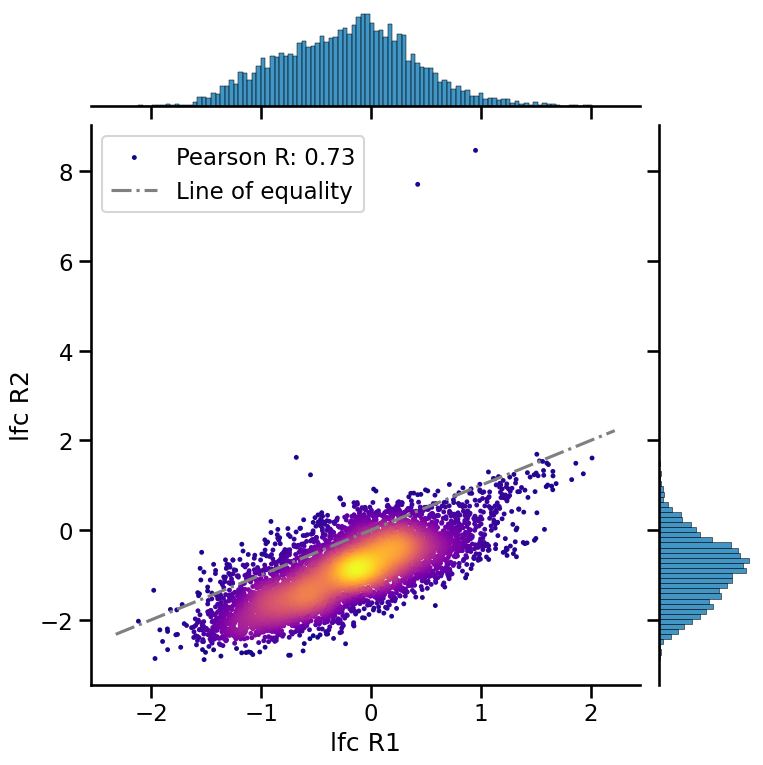

In [69]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.colors import Normalize 
from scipy.interpolate import interpn

def density_scatter( x , y, line=True, ax = None, sort = True, bins = 20, **kwargs )   :
    """
    Scatter plot colored by 2d histogram
    """
    x= np.array(x)
    y= np.array(y)
    mask = np.isfinite(x)&np.isfinite(y)
    x = x[mask]
    y = y[mask]
    if ax is None :
        ax = plt.gca()
    data , x_e, y_e = np.histogram2d( x, y, bins = bins, density = True )
    z = interpn( ( 0.5*(x_e[1:] + x_e[:-1]) , 0.5*(y_e[1:]+y_e[:-1]) ) , data , np.vstack([x,y]).T , method = "splinef2d", bounds_error = False)

    #To be sure to plot all data
    z[np.where(np.isnan(z))] = 0.0

    # Sort the points by density, so that the densest points are plotted last
    if sort :
        idx = z.argsort()
        x, y, z = x[idx], y[idx], z[idx]

    r = pearsonr(x, y)[0]
    ax.scatter( x, y, c=z, label=f'Pearson R: {round(r, 2)}', **kwargs )
    
    if line:
        xmin, xmax = ax.get_xlim()
        ymin, ymax = ax.get_ylim()

        start = max(xmin, ymin)
        end = min(xmax, ymax)

        p = ax.plot([start,end], [start,end], color='grey', linestyle='-.', label='Line of equality')

    plt.legend()

    # norm = Normalize(vmin = np.min(z), vmax = np.max(z))
    # cbar = fig.colorbar(cm.ScalarMappable(norm = norm), ax=ax)
    # cbar.ax.set_ylabel('Density')

    return ax


g = sns.JointGrid(data = to_analyze, x ='lfc R1', y='lfc R2', height=8)
g.plot_marginals(sns.histplot, bins = 100)
g.plot_joint(density_scatter, cmap='plasma', s=4)

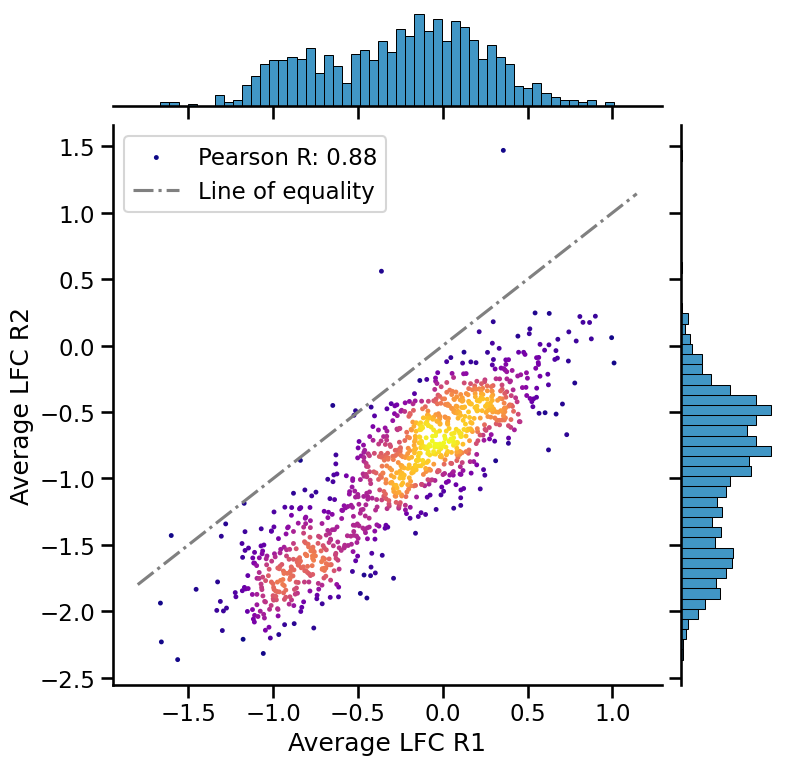

In [70]:
agged = to_analyze[['lfc R1','lfc R2','variant']].groupby('variant').mean().rename(columns = {'lfc R1':'Average LFC R1','lfc R2': 'Average LFC R2'})

g = sns.JointGrid(data = agged, x ='Average LFC R1', y='Average LFC R2', height=8)
g.plot_marginals(sns.histplot, bins = 50)
g.plot_joint(density_scatter, cmap='plasma', s=4)

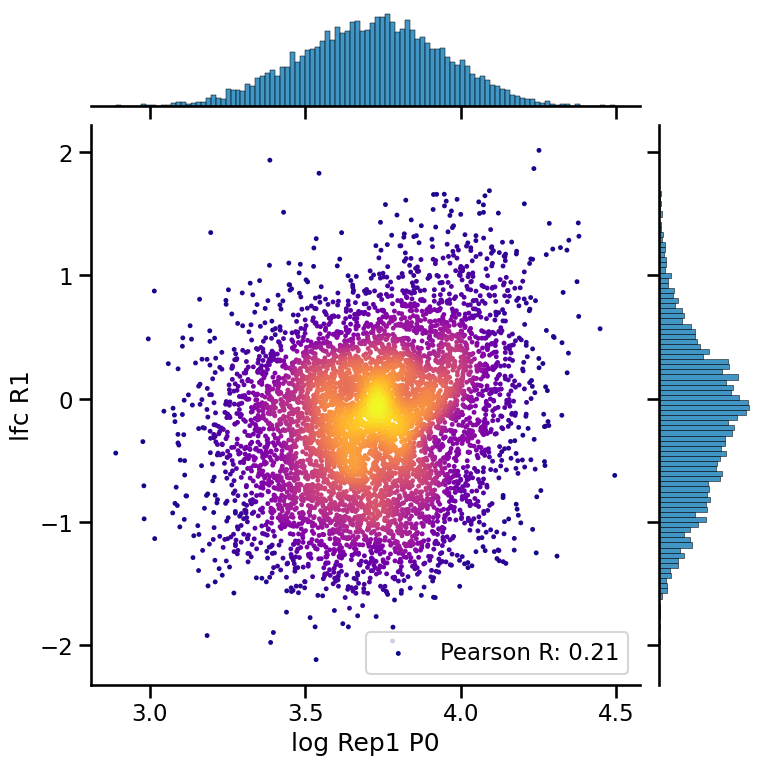

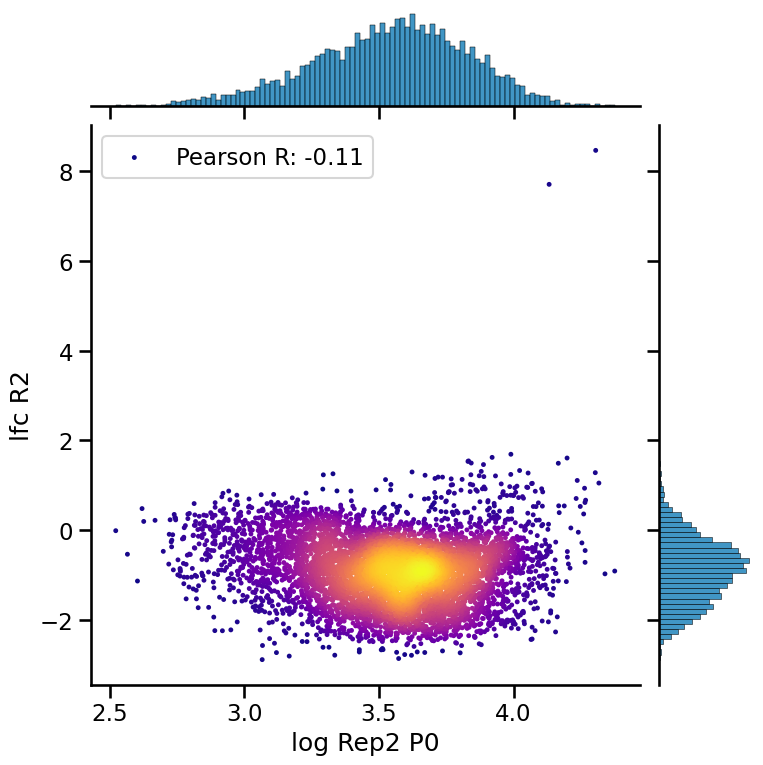

In [71]:
to_analyze['log Rep1 P0'] = np.log10(to_analyze['Rep1 P0'])
g = sns.JointGrid(data = to_analyze, x ='log Rep1 P0', y='lfc R1', height=8)
g.plot_marginals(sns.histplot, bins = 100)
g.plot_joint(density_scatter, cmap='plasma', s=4, line=False)
plt.show()

to_analyze['log Rep2 P0'] = np.log10(to_analyze['Rep2 P0'])
g = sns.JointGrid(data = to_analyze, x ='log Rep2 P0', y='lfc R2', height=8)
g.plot_marginals(sns.histplot, bins = 100)
g.plot_joint(density_scatter, cmap='plasma', s=4, line=False)
plt.show()


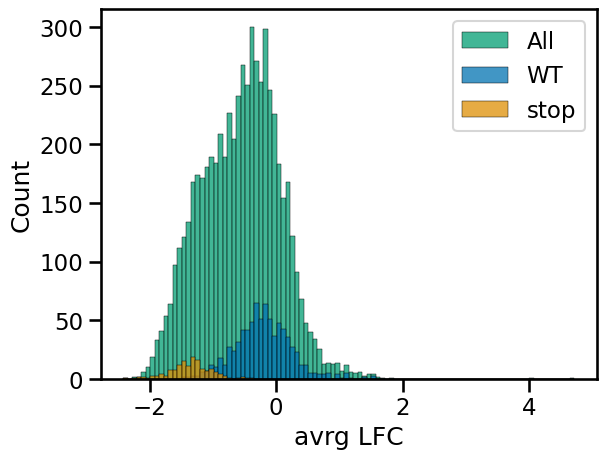

In [55]:
bins = np.histogram_bin_edges(to_analyze['avrg LFC'], bins = 100)

sns.histplot(to_analyze['avrg LFC'], label='All', bins = bins, color='C2')
sns.histplot(to_analyze[to_analyze.variant == 'WT']['avrg LFC'], label='WT', bins = bins)
sns.histplot(to_analyze[to_analyze.AA == '*']['avrg LFC'], label='stop', bins = bins)
plt.legend()

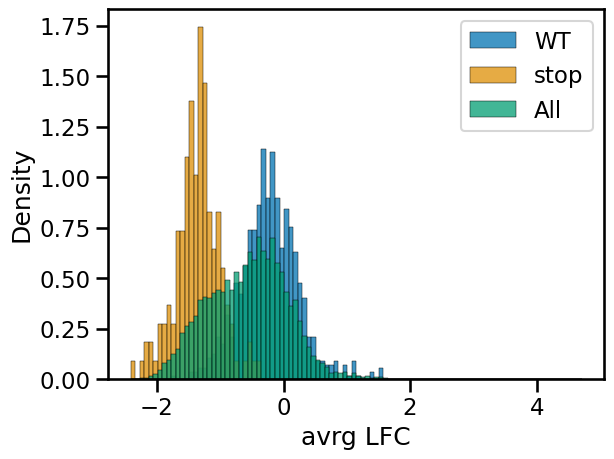

In [35]:
bins = np.histogram_bin_edges(to_analyze['avrg LFC'], bins = 100)

sns.histplot(to_analyze[to_analyze.variant == 'WT']['avrg LFC'], label='WT', bins = bins, stat = 'density')
sns.histplot(to_analyze[to_analyze.AA == '*']['avrg LFC'], label='stop', bins = bins, stat = 'density')
sns.histplot(to_analyze['avrg LFC'], label='All', bins = bins, stat = 'density')
plt.legend()

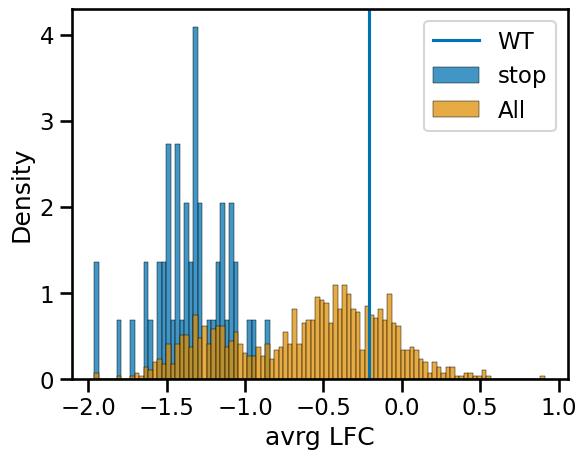

In [51]:
agged = to_analyze[['avrg LFC','variant']].groupby('variant').mean()

bins = np.histogram_bin_edges(agged['avrg LFC'], bins = 100)

sns.histplot(agged[agged.index.str.contains('\*')]['avrg LFC'], label='stop', bins = bins, stat = 'density')
sns.histplot(agged['avrg LFC'], label='All', bins = bins, stat = 'density')
plt.axvline(agged[agged.index == 'WT']['avrg LFC'].iloc[0], label='WT')

plt.legend()